# Task
We have been asked to use our hypothesis testing skills to answer the following questions:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?

For each question, make sure to:

- State your Null Hypothesis and Alternative Hypothesis
- Select the correct test according to the data type and number of samples
- Test the assumptions of your selected test.
- Execute the selected test, or the alternative test (if you do not meet the assumptions)
- Interpret your p-value and reject or fail to reject your null hypothesis 
- Show a supporting visualization that helps display the result





In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import pandas as pd
import os
os.makedirs('Data/',exist_ok=True) 
os.listdir('Data')
df=pd.read_csv('Data/insurance - insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Q1. Do smokers have higher insurance charges than non-smokers?
- Hypotheses
    - null: there is not higher charges between smoker/non-smoker
    - alternative:there is a significant difference in charges between smokers/non-smokers
    
- test selection: 2 sample T test(numeric data between 2 samples )

- aplha:0.05

In [2]:
smoker = df.loc[ df['smoker']=='yes'].copy()
not_smoker = df.loc[ df['smoker']=='no'].copy()
smoker_charge= smoker['charges']
non_smoker_charge= not_smoker['charges']

In [3]:
# Check for outliers in smokers
zscores= stats.zscore(smoker_charge)
outliers = abs(zscores)>3
np.sum(outliers)



0

In [4]:
non_smoker_charge

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [5]:
zscores= stats.zscore(non_smoker_charge)
outliers = abs(zscores)>3
np.sum(outliers)

24

In [6]:
# remove outlier (normally performed for both groups but no outliers present in smoker group)
non_smoker_charge = non_smoker_charge[(np.abs(stats.zscore(non_smoker_charge)) < 3)]







In [7]:
non_smoker_charge

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1040, dtype: float64

In [8]:
# test normality
smoker_charge = stats.normaltest(smoker_charge)
smoker_charge
print(smoker_charge.pvalue<.05)

True


In [9]:
# test normality
non_smoker_charge = stats.normaltest(non_smoker_charge)
non_smoker_charge
print(non_smoker_charge.pvalue<.05)

True


both groups came back with a pvlaue under .05 indicating a not normal distribution.

due to the sample sizes of both groups meeting criteria of N >15 we can safely ignore the normality test results and move on the the next assumption test.

In [10]:
# equal variance test

In [11]:
result = stats.ttest_ind(smoker_charge, non_smoker_charge, equal_var = False)
result

Ttest_indResult(statistic=-0.5878729993217828, pvalue=0.6437133424788231)

p value > .05 reject null plot below relates

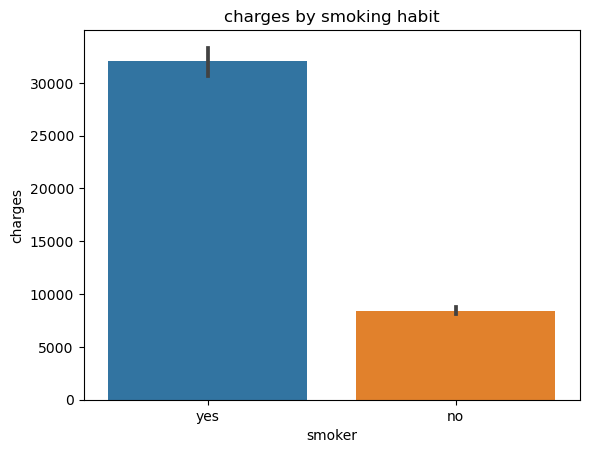

In [12]:
ax= sns.barplot(data=df, x='smoker',y='charges');
ax.set_title("charges by smoking habit");

# Q2. Are men more likely to smoke than women?
- Hypotheses
    - null: men are no more likely than women to smoke
    - alternative: men are more likely to smoke than women
    
- test selection: Chi-square(categorical,between 2 samples)

- aplha:0.05

In [13]:
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [14]:
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result 

In [15]:
print(p)
p<.05

0.006548143503580696


True

p value lower than .05 reject null hypothesis

plot below relates the insignificant difference between sex and smoker status



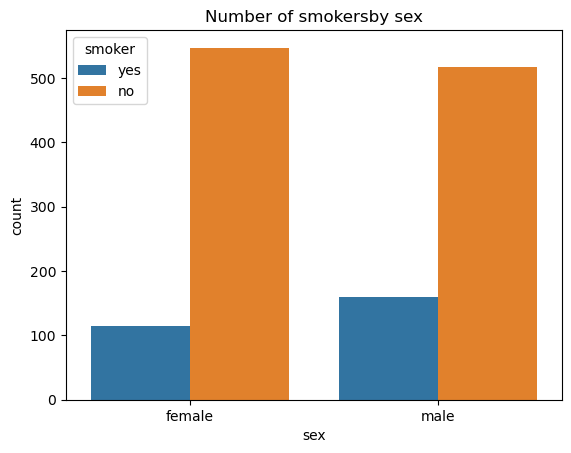

In [16]:
ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Number of smokersby sex");

# Q3. Do different regions have different charges, on average?
- Hypotheses
    - null: regions do not vary on charges.
    - alternative:charges vary depending on region.
    
    
- test selection: ANNOVA(4 groups with possible significant differences)

- aplha:0.05
    
    
   

In [17]:
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [18]:
## Running normal test on each group and confirming there are >20 in each group

norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df



,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


- all groups do not have normal distribution

In [19]:
# assumption of eqal variance

# not using * operator, entering each group manually
stats.levene(groups['southwest'],
            groups['southeast'],
            groups['northwest'],
            groups['northeast'])



LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

- test assumption of equal variance not met

In [22]:

stats.kruskal(groups['southwest'],
            groups['southeast'],
            groups['northwest'],
            groups['northeast'])

KruskalResult(statistic=4.734181215658743, pvalue=0.19232908072121002)

- pvalue >.05
-  reject the alternative hypothesis
- regions do NOT have significant changes of charges

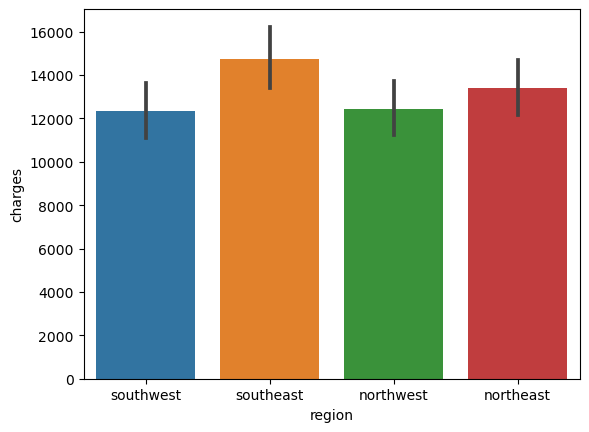

In [21]:
sns.barplot(data=df, x='region',y='charges');